In [114]:
import numpy as np
from os.path import join as pjoin
import hypertools as hyp
import pandas as pd
from IPython.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import runpy
%matplotlib inline

In [2]:
# import functions from other scripts
file_globals = runpy.run_path('digit_classification.py')
get_digit_indices = file_globals['get_digit_indices']

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# load data
results_dir = '/data/BnB_USER/oliver/somato/scratch/crossval_projection'

# for first run is training, second is test
proj_data_run1train_npy = pjoin(results_dir, 'proj_run1_is_train.npy')
trained_srms_run1train_npy = pjoin(results_dir, 'trainedsrms_run1_is_train.npy')
with open(proj_data_run1train_npy, 'rb') as inf:
    proj_data_run1train = np.load(inf)
with open(trained_srms_run1train_npy, 'rb') as inf:
    trained_srms_run1train = np.load(inf)
    
# second run is training, first is test
proj_data_run2train_npy = pjoin(results_dir, 'proj_run2_is_train.npy')
trained_srms_run2train_npy = pjoin(results_dir, 'trainedsrms_run2_is_train.npy')

with open(proj_data_run2train_npy, 'rb') as inf:
    proj_data_run2train = np.load(inf)
with open(trained_srms_run1train_npy, 'rb') as inf:
    trained_srms_run2train = np.load(inf)

In [4]:
# make lists of data frames for hypertools plotting

# first run is training, second is test
projected_dfs_run2 = []
trained_srms_dfs_run1 = []

for sub_idx in range(proj_data_run1train.shape[0]):
    df = pd.DataFrame(proj_data_run1train[sub_idx].T)
    projected_dfs_run2.append(df)
    srm_df = pd.DataFrame(trained_srms_run1train[sub_idx].T)
    trained_srms_dfs_run1.append(srm_df)

# second run is training, first is test
projected_dfs_run1 = []
trained_srms_dfs_run2 = []

for sub_idx in range(proj_data_run2train.shape[0]):
    df = pd.DataFrame(proj_data_run2train[sub_idx].T)
    projected_dfs_run1.append(df)
    srm_df = pd.DataFrame(trained_srms_run2train[sub_idx].T)
    trained_srms_dfs_run2.append(srm_df)

# set up finger colors

Text(0.5, 1.0, 'finger color arrays')

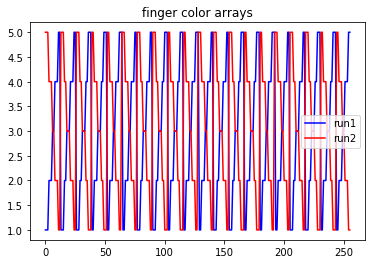

In [5]:
# create finger-color arrays

# get ndarrays (nfingers, nvols)
digits_run1, digits_run2 = get_digit_indices()

# turn into flat arrays with values 1-5
digit_colors_run1, digit_colors_run2 = np.zeros(shape=(256)), np.zeros(shape=(256))
for finger_i in range(1,6):
    digit_colors_run1[digits_run1[finger_i-1]] = finger_i
    digit_colors_run2[digits_run2[finger_i-1]] = finger_i

# for some reason, the first entry in the first run's digit array is a 5, but should be a 1...
digit_colors_run1[0]=1.

# look at result to make sure it makes sens
plt.plot(digit_colors_run1, color='b')
plt.plot(digit_colors_run2, color='r')
plt.legend(['run1', 'run2'])
plt.title('finger color arrays')

# Plot run-wise projected data and SRM templates for given subject

In [212]:
def plot_all_for_subject(sub_idx,
                         elevations_per_plot=(30,30,30,30),
                         reduce_method='PCA',
                         figsize=(8,5),
                         line_style='solid',
                         marker_style='.',
                         color_palette='muted',
                         fmt_style=None,
                         n_dimensions=3):
    
    print('plotting subject %i' % (sub_idx+1))
    
    run1_legend = ['d%i' %i for i in range(1,6)]
    run2_legend = ['d%i' %i for i in range(5,0,-1)]
    figkwargs = {'reduce':reduce_method, 'size':figsize, 
                 'linestyle':line_style, 'marker': marker_style, 
                 'palette':color_palette}  #, 'fmt':fmt_style, 'ndims':n_dimensions}
    
    # data from second run projected onto srm trained on first run
    geo = hyp.plot(projected_dfs_run2[sub_idx], title='projected data: subject %i, run 2.' % (sub_idx+1), 
                   group=digit_colors_run2, elev=elevations_per_plot[0], legend=run2_legend,
                   **figkwargs)
    geo.fig.savefig('animations/proj_sub%i_run2'% (sub_idx+1), dpi=300)

    # srm trained on first run (with that subject held out)
    geo = hyp.plot(trained_srms_dfs_run1[sub_idx], title='SRM: subject %i held out, run 1.'% (sub_idx+1), 
                   group=digit_colors_run1, elev=elevations_per_plot[1], legend=run1_legend,
                   **figkwargs)
    geo.fig.savefig('animations/srm_sub%i_run1'% (sub_idx+1), dpi=300)
    
    # data from first run projected onto srm trained on second run
    geo = hyp.plot(projected_dfs_run1[sub_idx], title='projected data: subject %i, run 1.'% (sub_idx+1), 
                   group=digit_colors_run1,  elev=elevations_per_plot[2], legend=run1_legend,
                   **figkwargs)
    geo.fig.savefig('animations/proj_sub%i_run1'% (sub_idx+1), dpi=300)
    
    # srm trained on second run (with that subject held out)
    geo = hyp.plot(trained_srms_dfs_run2[sub_idx], title='SRM: subject %i held out, run 2.'% (sub_idx+1), 
                   group=digit_colors_run2, elev=elevations_per_plot[3], legend=run2_legend,
                   **figkwargs)
    geo.fig.savefig('animations/srm_sub%i_run2'% (sub_idx+1), dpi=300)

plotting subject 1


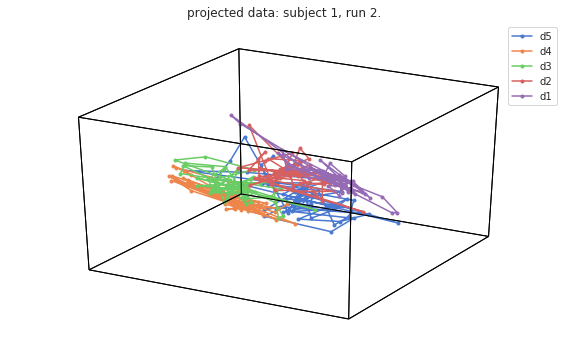

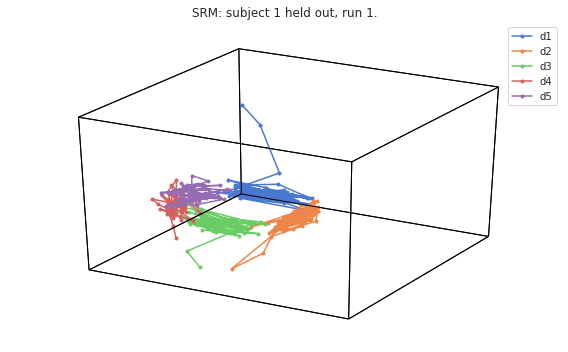

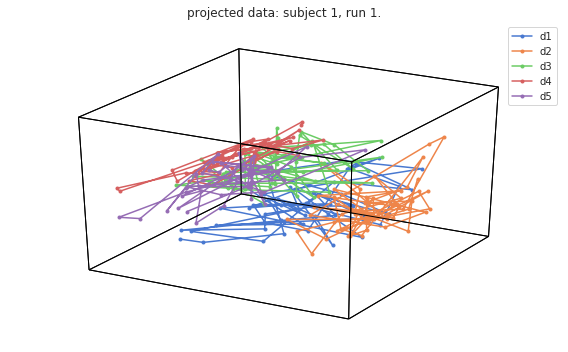

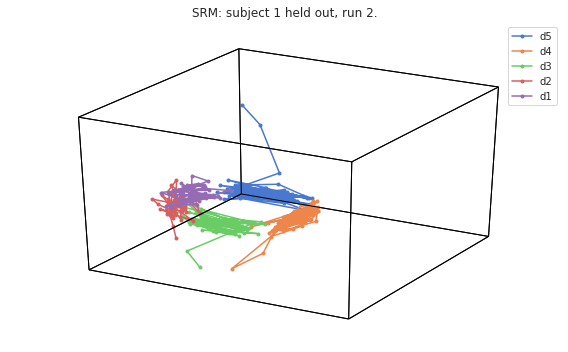

plotting subject 2


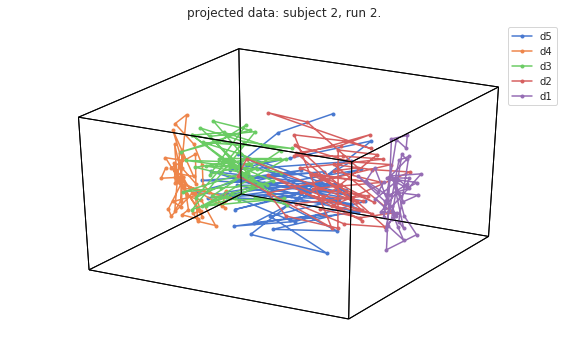

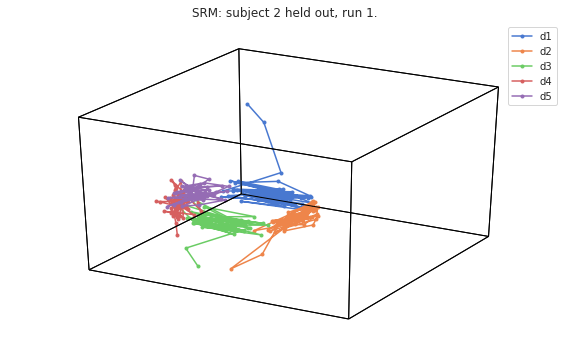

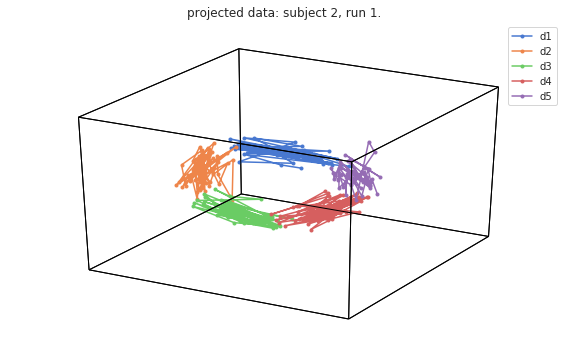

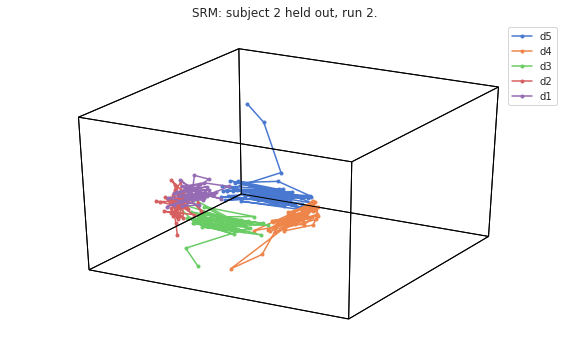

plotting subject 3


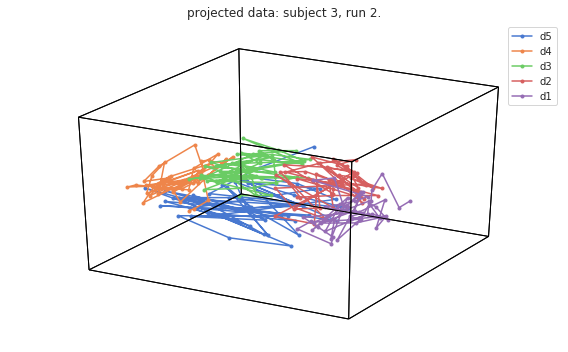

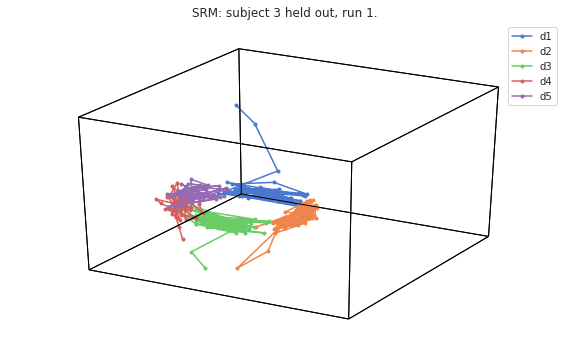

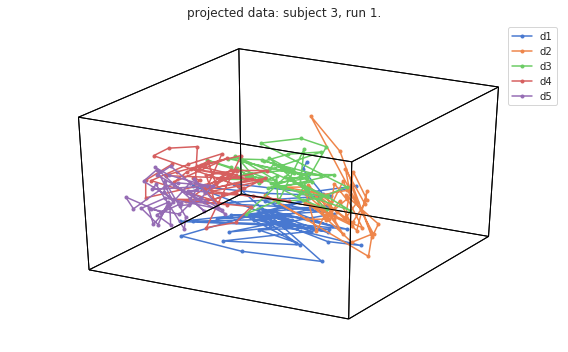

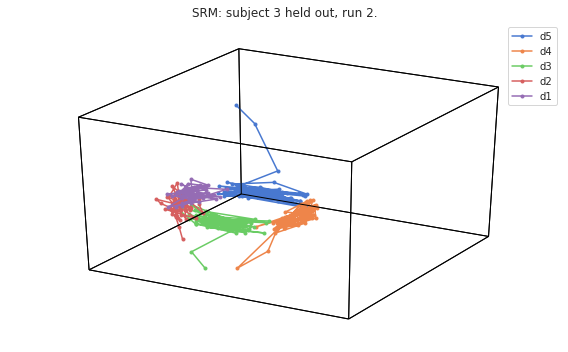

plotting subject 4


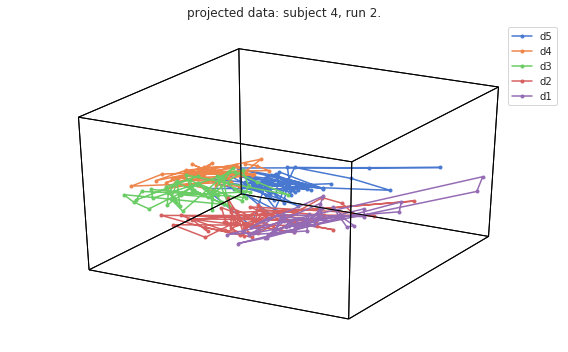

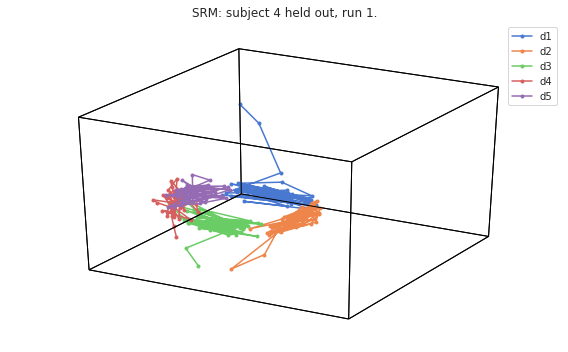

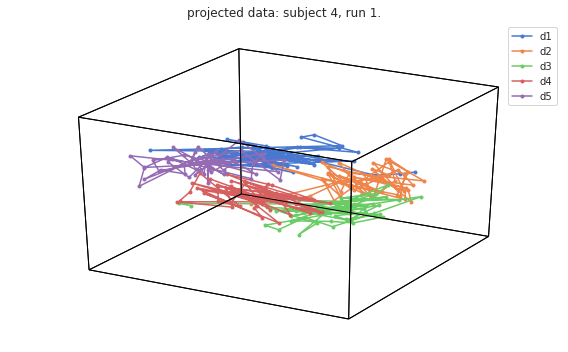

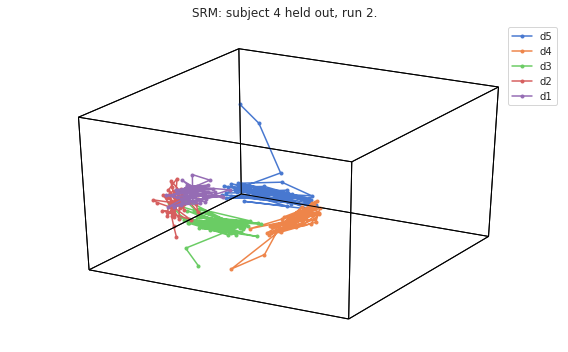

plotting subject 5


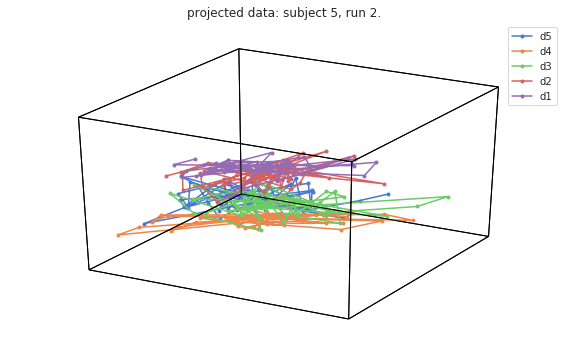

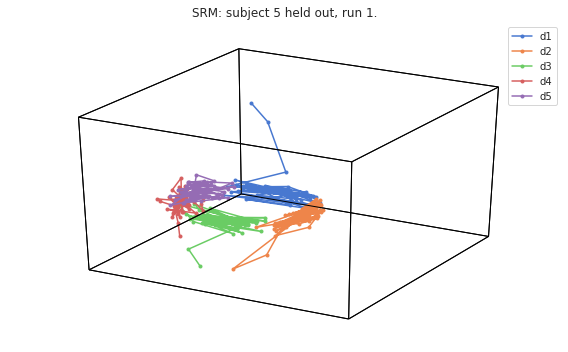

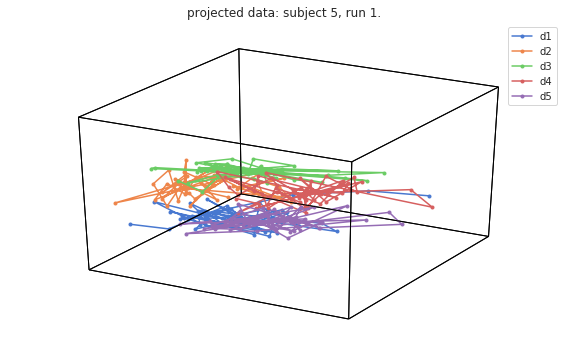

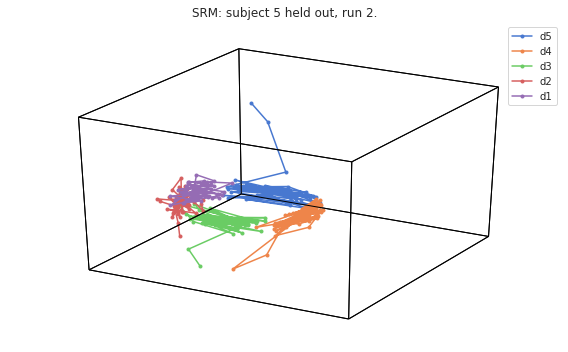

In [215]:
# plot the first few subjects

for subidx in range(5):
    plot_all_for_subject(subidx)  #, fmt_style='.', line_style=None, n_dimensions=2)

# Playground

## Compare different dimensionality reduction algorithms

reduce : str or dict
    Decomposition/manifold learning model to use.  Models supported: PCA,
    IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA,
    FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning,
    TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, and MDS. Can be
    passed as a string, but for finer control of the model parameters, pass
    as a dictionary, e.g. reduce={'model' : 'PCA', 'params' : {'whiten' : True}}.
    See scikit-learn specific model docs for details on parameters supported
    for each model.

Default is IncrementalPCA

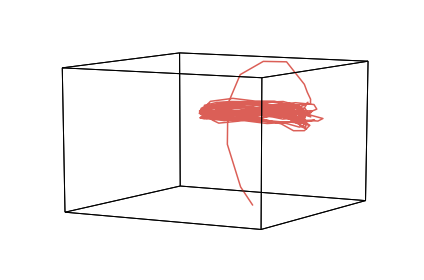

In [11]:
geo = hyp.plot(trained_srms_dfs_run1[0], reduce='IncrementalPCA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


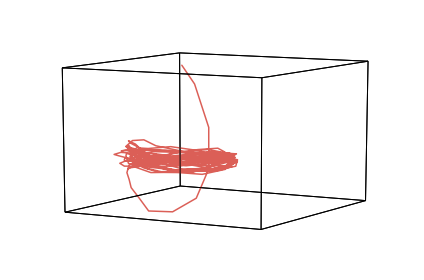

In [12]:
geo = hyp.plot(trained_srms_dfs_run1[0], reduce='PCA')

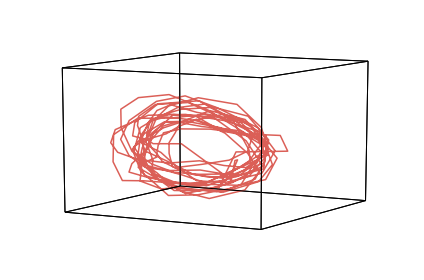

In [13]:
geo = hyp.plot(trained_srms_dfs_run1[0], reduce='MDS')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


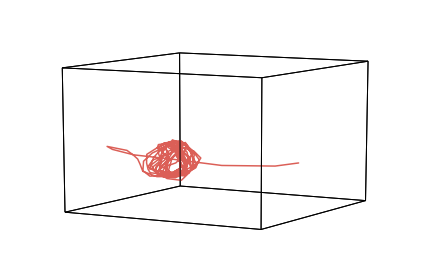

In [14]:
geo = hyp.plot(trained_srms_dfs_run1[0], reduce='FastICA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


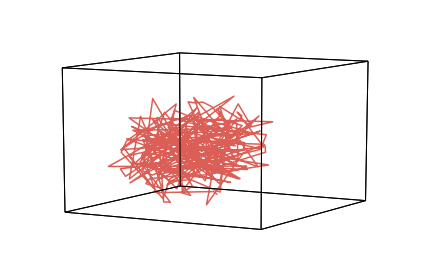

In [15]:
geo = hyp.plot(trained_srms_dfs_run1[0], reduce='TSNE')

- Use MDS instead of PCA

In [16]:
# plot projected data trajectories

geo = hyp.plot(trained_srms_dfs_run1[:4],
               size=[8,4], animate='parallel', frame_rate=10,
               tail_duration=1.,
               chemtrails=False,
               zoom=1.5,
               show=False)

anim = geo.line_ani
HTML(anim.to_html5_video())

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


## Try hyperaligning response vectors

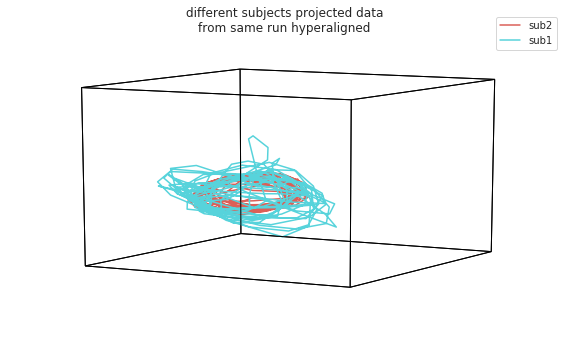

In [35]:
# Different subjects from same run

# basic principle is [procrustes(source, target), target]
aligned_sub1and2_run2 = [hyp.tools.procrustes(projected_dfs_run2[1], projected_dfs_run2[0]), projected_dfs_run2[0]]
hyp.plot(aligned_sub1and2_run2, title='different subjects projected data\nfrom same run hyperaligned', 
         legend=['sub2', 'sub1'], reduce='PCA', size=[8,5])

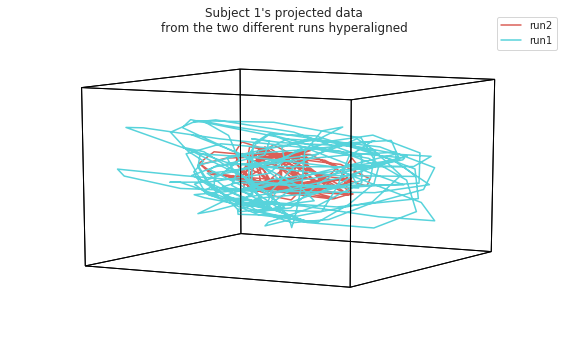

In [34]:
# same subject's data from different runs

aligned_sub1_run1and2 = [hyp.tools.procrustes(projected_dfs_run2[0], projected_dfs_run1[0]), projected_dfs_run1[0]]
hyp.plot(aligned_sub1_run1and2, title="Subject 1's projected data\nfrom the two different runs hyperaligned", 
         legend=['run2', 'run1'], reduce='PCA', size=[8,5])